# Ao3 version history

Information based on [news posts](https://archiveofourown.org/languages/en/admin_posts?tag=1&page=1) from [Archive of Our Own](https://archiveofourown.org/).

In [84]:
# package imports
from gazpacho import get
from gazpacho import Soup
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

## Determining the number of pages

In [1]:
# initial url to grab number of pages
url = "https://archiveofourown.org/languages/en/admin_posts?tag=1&page=1"
html = get(url)

In [14]:
# grabbing pagination info from the paginatoin actions class
soup = Soup(html)
cards = soup.find("ol", {"class": "pagination actions"})
cards = cards.find("li")
cards

[<li class="previous" title="previous">
   <span class="disabled">← Previous</span>
 </li>,
 <li>
   <span class="current">1</span>
 </li>,
 <li><a rel="next" href="/languages/en/admin_posts?page=2&tag=1">2</a></li>,
 <li><a href="/languages/en/admin_posts?page=3&tag=1">3</a></li>,
 <li><a href="/languages/en/admin_posts?page=4&tag=1">4</a></li>,
 <li><a href="/languages/en/admin_posts?page=5&tag=1">5</a></li>,
 <li><a href="/languages/en/admin_posts?page=6&tag=1">6</a></li>,
 <li><a href="/languages/en/admin_posts?page=7&tag=1">7</a></li>,
 <li><a href="/languages/en/admin_posts?page=8&tag=1">8</a></li>,
 <li><a href="/languages/en/admin_posts?page=9&tag=1">9</a></li>,
 <li class="gap">…</li>,
 <li><a href="/languages/en/admin_posts?page=18&tag=1">18</a></li>,
 <li><a href="/languages/en/admin_posts?page=19&tag=1">19</a></li>,
 <li class="next" title="next"><a rel="next" href="/languages/en/admin_posts?page=2&tag=1">Next →</a></li>]

In [21]:
pagination = [card.text for card in cards]
pagination

['← Previous',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '…',
 '18',
 '19',
 'Next →']

In [23]:
number_of_pages = pagination[-2]
number_of_pages

'19'

## Data from example page

In [35]:
cards_heading = soup.find("h3", {"class": "heading"}, partial = False)
cards_heading
releases = [card.text for card in cards_heading]
releases

['Releases 0.9.298, 0.9.306 - 0.9.309: Change Log',
 'Releases 0.9.299 - 0.9.305: Change Log',
 'Release 0.9.297: Change Log',
 'Releases 0.9.295 - 0.9.296: Change Log',
 'Releases 0.9.290 - 0.9.293: Change Log',
 'Releases 0.9.286 - 0.9.288: Change Log',
 'Releases 0.9.280 - 0.9.285: Change Log',
 'Releases 0.9.276 - 0.9.279: Change Log']

In [37]:
cards_timestamp = soup.find("dd", {"class": "published"})
cards_timestamp
timestamps = [card.text for card in cards_timestamp]
timestamps

['2021-11-11 23:43:18 UTC',
 '2021-07-27 20:15:19 UTC',
 '2021-01-23 19:09:49 UTC',
 '2020-12-08 15:06:47 UTC',
 '2020-08-17 13:53:14 UTC',
 '2020-06-24 17:39:57 UTC',
 '2020-04-14 19:39:56 UTC',
 '2020-03-18 23:16:03 UTC']

In [46]:
page_dict = {timestamp:release for (release,timestamp) in zip(releases,timestamps)}
page_dict

{'2021-11-11 23:43:18 UTC': 'Releases 0.9.298, 0.9.306 - 0.9.309: Change Log',
 '2021-07-27 20:15:19 UTC': 'Releases 0.9.299 - 0.9.305: Change Log',
 '2021-01-23 19:09:49 UTC': 'Release 0.9.297: Change Log',
 '2020-12-08 15:06:47 UTC': 'Releases 0.9.295 - 0.9.296: Change Log',
 '2020-08-17 13:53:14 UTC': 'Releases 0.9.290 - 0.9.293: Change Log',
 '2020-06-24 17:39:57 UTC': 'Releases 0.9.286 - 0.9.288: Change Log',
 '2020-04-14 19:39:56 UTC': 'Releases 0.9.280 - 0.9.285: Change Log',
 '2020-03-18 23:16:03 UTC': 'Releases 0.9.276 - 0.9.279: Change Log'}

## Data for all pages


In [61]:
def grab_data(url):
    """
    This function takes in Archive of Our Own `url` of the news page
    and returns a dictionary where keys are the timestamps,
    and values are the newspost headings.
    """
    html = get(url)
    soup = Soup(html)
    cards_heading = soup.find("h3", {"class": "heading"}, partial = False)
    titles = [card.text for card in cards_heading]
    cards_timestamp = soup.find("dd", {"class": "published"})
    timestamps = [card.text for card in cards_timestamp]
    page_list = [{'timestamp':timestamp, 'title':title} for (title,timestamp) in zip(titles,timestamps)]
    return page_list

In [62]:
url = "https://archiveofourown.org/languages/en/admin_posts?tag=1&page=1"
grab_data(url)

[{'timestamp': '2021-11-11 23:43:18 UTC',
  'title': 'Releases 0.9.298, 0.9.306 - 0.9.309: Change Log'},
 {'timestamp': '2021-07-27 20:15:19 UTC',
  'title': 'Releases 0.9.299 - 0.9.305: Change Log'},
 {'timestamp': '2021-01-23 19:09:49 UTC',
  'title': 'Release 0.9.297: Change Log'},
 {'timestamp': '2020-12-08 15:06:47 UTC',
  'title': 'Releases 0.9.295 - 0.9.296: Change Log'},
 {'timestamp': '2020-08-17 13:53:14 UTC',
  'title': 'Releases 0.9.290 - 0.9.293: Change Log'},
 {'timestamp': '2020-06-24 17:39:57 UTC',
  'title': 'Releases 0.9.286 - 0.9.288: Change Log'},
 {'timestamp': '2020-04-14 19:39:56 UTC',
  'title': 'Releases 0.9.280 - 0.9.285: Change Log'},
 {'timestamp': '2020-03-18 23:16:03 UTC',
  'title': 'Releases 0.9.276 - 0.9.279: Change Log'}]

In [76]:
url_template = "https://archiveofourown.org/languages/en/admin_posts?tag=1&page="
news_list = []
for i in range(1, int(number_of_pages)+1):
    url = url_template + str(i)
    news_list = news_list + grab_data(url)
    time.sleep(random.randint(3, 6)) # sleeping to avoid requests to the site being fired too often

In [88]:
news_list[0:5]

[{'timestamp': '2021-11-11 23:43:18 UTC',
  'title': 'Releases 0.9.298, 0.9.306 - 0.9.309: Change Log'},
 {'timestamp': '2021-07-27 20:15:19 UTC',
  'title': 'Releases 0.9.299 - 0.9.305: Change Log'},
 {'timestamp': '2021-01-23 19:09:49 UTC',
  'title': 'Release 0.9.297: Change Log'},
 {'timestamp': '2020-12-08 15:06:47 UTC',
  'title': 'Releases 0.9.295 - 0.9.296: Change Log'},
 {'timestamp': '2020-08-17 13:53:14 UTC',
  'title': 'Releases 0.9.290 - 0.9.293: Change Log'}]

## Making data pretty

In [78]:
pandas_df = pd.DataFrame(news_list)
pandas_df.assign(timestamp=lambda d: pd.to_datetime(d["timestamp"]))
pandas_df

,timestamp,title
0,2021-11-11 23:43:18 UTC,"Releases 0.9.298, 0.9.306 - 0.9.309: Change Log"
1,2021-07-27 20:15:19 UTC,Releases 0.9.299 - 0.9.305: Change Log
2,2021-01-23 19:09:49 UTC,Release 0.9.297: Change Log
3,2020-12-08 15:06:47 UTC,Releases 0.9.295 - 0.9.296: Change Log
4,2020-08-17 13:53:14 UTC,Releases 0.9.290 - 0.9.293: Change Log
...,...,...
143,2009-12-17 22:28:55 UTC,Release Notes for Release 0.7.2
144,2009-12-01 16:58:40 UTC,Release notes for R1789
145,2009-11-22 23:23:49 UTC,Release Notes for R1762
146,2009-11-07 21:44:49 UTC,Release Notes for R1692


In [79]:
pandas_df.timestamp.describe()

count                         148
unique                        148
top       2021-11-11 23:43:18 UTC
freq                            1
Name: timestamp, dtype: object

In [80]:
pandas_df['year'] = pd.DatetimeIndex(pandas_df.timestamp).year
pandas_df

,timestamp,title,year
0,2021-11-11 23:43:18 UTC,"Releases 0.9.298, 0.9.306 - 0.9.309: Change Log",2021
1,2021-07-27 20:15:19 UTC,Releases 0.9.299 - 0.9.305: Change Log,2021
2,2021-01-23 19:09:49 UTC,Release 0.9.297: Change Log,2021
3,2020-12-08 15:06:47 UTC,Releases 0.9.295 - 0.9.296: Change Log,2020
4,2020-08-17 13:53:14 UTC,Releases 0.9.290 - 0.9.293: Change Log,2020
...,...,...,...
143,2009-12-17 22:28:55 UTC,Release Notes for Release 0.7.2,2009
144,2009-12-01 16:58:40 UTC,Release notes for R1789,2009
145,2009-11-22 23:23:49 UTC,Release Notes for R1762,2009
146,2009-11-07 21:44:49 UTC,Release Notes for R1692,2009


In [81]:
pandas_df.year.unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009], dtype=int64)

In [82]:
pandas_df.year.nunique()

13

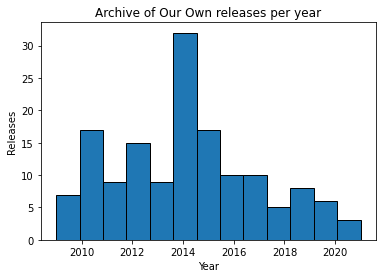

In [85]:
matplotlib_plot = plt.hist(pandas_df.year,
         edgecolor='black',
         bins=pandas_df.year.nunique());
plt.xlabel('Year')
plt.ylabel('Releases')
plt.title('Archive of Our Own releases per year')
plt.show()